In [18]:
include("solutionFunctions.jl")
println("Avaliable threads: ", Threads.nthreads())

Avaliable threads: 32


# Waves on a Ferrofluid Jet

In [12]:
## Initialize 

branchN = 100
a1Vals = collect(range(0.001, 0.33, branchN + 1))

# initialze constants
constants = Constants(36,π,1.5,0.1)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants);

# initial guess 
initial_guess = (1e-10).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-12]


## Compute solution branch
@time solutions, iterations = bifurcation(initial_guess, a1Vals, branchN, constants, 1e-8, :Broyden, 5000);

36.1.0e-8.100.Broyden
Branch point 10 of 100, 5 iterations.
Branch point 20 of 100, 5 iterations.
Branch point 30 of 100, 5 iterations.
Branch point 40 of 100, 5 iterations.
Branch point 50 of 100, 5 iterations.
Branch point 60 of 100, 5 iterations.
Branch point 70 of 100, 5 iterations.
Branch point 80 of 100, 5 iterations.
Branch point 90 of 100, 6 iterations.
Branch point 100 of 100, 11 iterations.
  1.084359 seconds (61.05 M allocations: 2.293 GiB, 21.02% gc time)


Comparing the different methods:

In [43]:
# ## Initialize 

# branchN = 100
# a1Vals = collect(range(0.001, 0.33, branchN + 1))

# # initialze constants
# constants = Constants(36,π,1.5,0.1)

# # initialize wave speed and wave number 
# k1 = 1*π/constants.L
# cInitial = c0(k1, constants);

# # initial guess 
# initial_guess = (1e-10).*ones(branchN+1, constants.N+2)
# initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-12]

# @time @noprint solutions_n = bifurcation(initial_guess, a1Vals, branchN, constants, 1e-8, :Newton, 5000);
# @time @noprint solutions_nr = bifurcation(initial_guess, a1Vals, branchN, constants, 1e-8, :NewtonRaphson, 5000);
# @time @noprint solutions_b = bifurcation(initial_guess, a1Vals, branchN, constants, 1e-8, :Broyden, 5000);

# # print time taken for each
# println("Newton: ", @elapsed solutions_n)
# println("NewtonRaphson: ", @elapsed solutions_nr)
# println("Broyden: ", @elapsed solutions_b)

The best solution (lowest `tol`) that we can compute, for the largest # of modes

In [14]:
## Initialize 

branchN = 10
a1Vals = collect(range(0.001, 0.33, branchN + 1))

# initialze constants
constants = Constants(36,π,1.5,0.1)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants);

# initial guess 
initial_guess = (1e-16).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]


## Compute solution branch
@time solutions, iterations = bifurcation(initial_guess, a1Vals, branchN, constants, 1e-16, :Newton, 50000);

Branch point 1 of 10, 46 iterations.
Branch point 2 of 10, 66 iterations.
Branch point 3 of 10, 14 iterations.
Branch point 4 of 10, 13 iterations.
Branch point 5 of 10, 2592 iterations.


CompositeException: TaskFailedException

    nested task error: TaskFailedException
    
        nested task error: InterruptException:
        Stacktrace:
          [1] _besseli(nu::Float64, z::ComplexF64, kode::Int32)
            @ SpecialFunctions ~/.julia/packages/SpecialFunctions/QH8rV/src/bessel.jl:227
          [2] besseli
            @ ~/.julia/packages/SpecialFunctions/QH8rV/src/bessel.jl:364 [inlined]
          [3] besseli
            @ ~/.julia/packages/SpecialFunctions/QH8rV/src/bessel.jl:454 [inlined]
          [4] _broadcast_getindex_evalf
            @ ./broadcast.jl:709 [inlined]
          [5] _broadcast_getindex
            @ ./broadcast.jl:682 [inlined]
          [6] _getindex
            @ ./broadcast.jl:706 [inlined]
          [7] _getindex
            @ ./broadcast.jl:705 [inlined]
          [8] _broadcast_getindex
            @ ./broadcast.jl:681 [inlined]
          [9] _getindex
            @ ./broadcast.jl:705 [inlined]
         [10] _broadcast_getindex
            @ ./broadcast.jl:681 [inlined]
         [11] getindex
            @ ./broadcast.jl:636 [inlined]
         [12] macro expansion
            @ ./broadcast.jl:1004 [inlined]
         [13] macro expansion
            @ ./simdloop.jl:77 [inlined]
         [14] copyto!
            @ ./broadcast.jl:1003 [inlined]
         [15] copyto!
            @ ./broadcast.jl:956 [inlined]
         [16] copy
            @ ./broadcast.jl:928 [inlined]
         [17] materialize
            @ ./broadcast.jl:903 [inlined]
         [18] macro expansion
            @ ~/Documents/ferrofluidstabilty/solutions/solutionFunctions.jl:194 [inlined]
         [19] (::var"#90#threadsfor_fun#14"{var"#90#threadsfor_fun#13#15"{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Irrational{:π}, Float64, Vector{Float64}, UnitRange{Int64}}})(tid::Int64; onethread::Bool)
            @ Main ./threadingconstructs.jl:215
         [20] #90#threadsfor_fun
            @ ./threadingconstructs.jl:182 [inlined]
         [21] (::Base.Threads.var"#1#2"{var"#90#threadsfor_fun#14"{var"#90#threadsfor_fun#13#15"{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Irrational{:π}, Float64, Vector{Float64}, UnitRange{Int64}}}, Int64})()
            @ Base.Threads ./threadingconstructs.jl:154
    Stacktrace:
     [1] threading_run(fun::var"#90#threadsfor_fun#14"{var"#90#threadsfor_fun#13#15"{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Irrational{:π}, Float64, Vector{Float64}, UnitRange{Int64}}}, static::Bool)
       @ Base.Threads ./threadingconstructs.jl:172
     [2] macro expansion
       @ ./threadingconstructs.jl:220 [inlined]
     [3] equations(unknowns::Vector{Float64}, constants::Constants, a₁::Float64, a₀::Float64)
       @ Main ~/Documents/ferrofluidstabilty/solutions/solutionFunctions.jl:189
     [4] f
       @ ~/Documents/ferrofluidstabilty/solutions/solutionFunctions.jl:232 [inlined]
     [5] macro expansion
       @ ~/Documents/ferrofluidstabilty/solutions/solutionFunctions.jl:153 [inlined]
     [6] (::var"#75#threadsfor_fun#11"{var"#75#threadsfor_fun#10#12"{var"#f#17"{Vector{Float64}, Constants, Int64}, Vector{Float64}, Vector{Float64}, Matrix{Float64}, Float64, UnitRange{Int64}}})(tid::Int64; onethread::Bool)
       @ Main ./threadingconstructs.jl:215
     [7] #75#threadsfor_fun
       @ ./threadingconstructs.jl:182 [inlined]
     [8] (::Base.Threads.var"#1#2"{var"#75#threadsfor_fun#11"{var"#75#threadsfor_fun#10#12"{var"#f#17"{Vector{Float64}, Constants, Int64}, Vector{Float64}, Vector{Float64}, Matrix{Float64}, Float64, UnitRange{Int64}}}, Int64})()
       @ Base.Threads ./threadingconstructs.jl:154

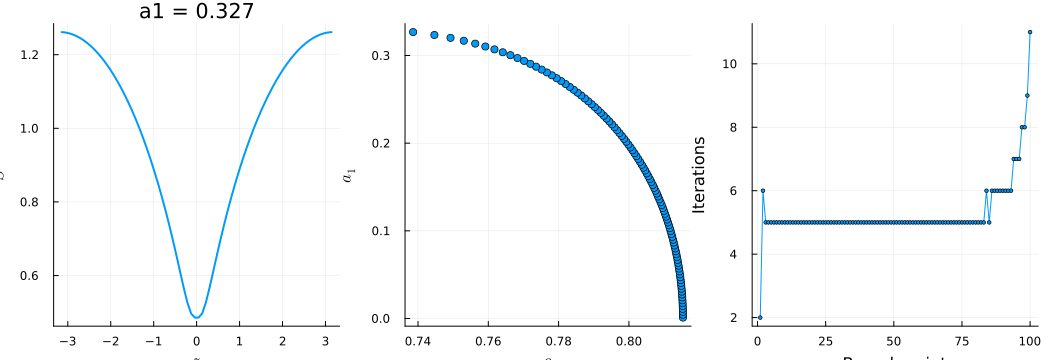

In [19]:
# plotting
profile_plot, branch_plot, coeff_plot, convergence_plot = plotting("36.1.0e-8.100.Broyden")
plot(profile_plot, branch_plot, convergence_plot, size=(350*3,360), layout = (1,3))

In [136]:
# compute solutions for a range of tolerances, branchN and N 
tolerances = [1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14]
branchNs = [10, 100, 1000, 10000]
Ns = [8, 10, 12, 14, 16, 18, 24, 32, 36, 38, 64, 128]

# initialize arrays to store time taken
times = zeros(length(tolerances), length(branchNs), length(Ns))

# loop over all combinations of tolerances, branchNs and Ns
for i = 1:length(tolerances)
    for j = 1:length(branchNs)
        for k = 1:length(Ns)
            # initialize constants
            constants = Constants(Ns[k],π,1.5,0.1)
            
            # initialize wave speed and wave number 
            k1 = 1*π/constants.L
            cInitial = c0(k1, constants);
            
            # initial guess 
            initial_guess = (1e-16).*ones(branchNs[j]+1, constants.N+2)
            initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]
            
            # time taken
            times[i,j,k] = @elapsed solutions = bifurcation(initial_guess, a1Vals, branchNs[j], constants, tolerances[i], :Broyden, 20000)
        end
    end
end

Branch point 1 of 10, 2 iterations.
Branch point 2 of 10, 6 iterations.
Branch point 3 of 10, 5 iterations.
Branch point 4 of 10, 5 iterations.
Branch point 5 of 10, 5 iterations.
Branch point 6 of 10, 5 iterations.
Branch point 7 of 10, 5 iterations.
Branch point 8 of 10, 5 iterations.
Branch point 9 of 10, 5 iterations.
Branch point 10 of 10, 5 iterations.
Branch point 1 of 10, 2 iterations.
Branch point 2 of 10, 6 iterations.
Branch point 3 of 10, 5 iterations.
Branch point 4 of 10, 5 iterations.
Branch point 5 of 10, 5 iterations.
Branch point 6 of 10, 5 iterations.
Branch point 7 of 10, 5 iterations.
Branch point 8 of 10, 5 iterations.
Branch point 9 of 10, 5 iterations.
Branch point 10 of 10, 5 iterations.


CompositeException: TaskFailedException

    nested task error: DomainError with -2.392241758908977:
    `x` must be nonnegative.
    Stacktrace:
      [1] besselk
        @ ~/.julia/packages/SpecialFunctions/QH8rV/src/bessel.jl:520 [inlined]
      [2] _broadcast_getindex_evalf
        @ ./broadcast.jl:709 [inlined]
      [3] _broadcast_getindex
        @ ./broadcast.jl:682 [inlined]
      [4] _getindex
        @ ./broadcast.jl:706 [inlined]
      [5] _getindex
        @ ./broadcast.jl:705 [inlined]
      [6] _broadcast_getindex
        @ ./broadcast.jl:681 [inlined]
      [7] _getindex
        @ ./broadcast.jl:706 [inlined]
      [8] _getindex
        @ ./broadcast.jl:705 [inlined]
      [9] _broadcast_getindex
        @ ./broadcast.jl:681 [inlined]
     [10] getindex
        @ ./broadcast.jl:636 [inlined]
     [11] macro expansion
        @ ./broadcast.jl:1004 [inlined]
     [12] macro expansion
        @ ./simdloop.jl:77 [inlined]
     [13] copyto!
        @ ./broadcast.jl:1003 [inlined]
     [14] copyto!
        @ ./broadcast.jl:956 [inlined]
     [15] copy
        @ ./broadcast.jl:928 [inlined]
     [16] materialize
        @ ./broadcast.jl:903 [inlined]
     [17] macro expansion
        @ ~/Documents/ferrofluidstabilty/solutions/solutionFunctions.jl:194 [inlined]
     [18] (::var"#2451#threadsfor_fun#404"{var"#2451#threadsfor_fun#403#405"{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Irrational{:π}, Float64, Vector{Float64}, UnitRange{Int64}}})(tid::Int64; onethread::Bool)
        @ Main ./threadingconstructs.jl:215
     [19] #2451#threadsfor_fun
        @ ./threadingconstructs.jl:182 [inlined]
     [20] (::Base.Threads.var"#1#2"{var"#2451#threadsfor_fun#404"{var"#2451#threadsfor_fun#403#405"{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Irrational{:π}, Float64, Vector{Float64}, UnitRange{Int64}}}, Int64})()
        @ Base.Threads ./threadingconstructs.jl:154

...and 11 more exceptions.
